In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_df = pd.read_csv("SalesTransactions.csv")

In [3]:
sales_df.head(5)

,Week,Purchase Quantity
0,W0,11
1,W1,12
2,W2,10
3,W3,8
4,W4,13


In [4]:
sales_df.set_index('Week', inplace = True)

In [5]:
sales_df.head(5)

,Purchase Quantity
Week,
W0,11
W1,12
W2,10
W3,8
W4,13


### Create lag based Univariate features

In [6]:
lag = [1,2,3]

In [7]:
for value in lag:
    sales_df[f'Purchase Quantity {value}'] = sales_df['Purchase Quantity'].shift(value)

In [8]:
 sales_df.fillna(0, inplace = True)

In [9]:
 sales_df.head(10)

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3
Week,,,,
W0,11,0.0,0.0,0.0
W1,12,11.0,0.0,0.0
W2,10,12.0,11.0,0.0
W3,8,10.0,12.0,11.0
W4,13,8.0,10.0,12.0
W5,12,13.0,8.0,10.0
W6,14,12.0,13.0,8.0
W7,21,14.0,12.0,13.0
W8,6,21.0,14.0,12.0


In [10]:
import matplotlib.pyplot as plt

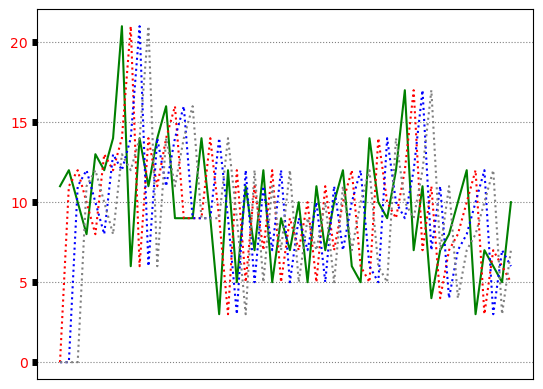

In [54]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
lag1 = sales_df['Purchase Quantity 1']
lag2 = sales_df['Purchase Quantity 2']
lag3 = sales_df['Purchase Quantity 3']

fig, ax = plt.subplots()
ax.plot(date, variable, linestyle='-', color = 'green')
ax.plot(date, lag1, linestyle=':', color = 'red')
ax.plot(date, lag2, linestyle=':', color = 'blue')
ax.plot(date, lag3, linestyle=':', color = 'grey')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

### Calculating rolling statistics

In [12]:
window = 3

In [13]:
sales_df['rolling_mean'] =  sales_df['Purchase Quantity'].rolling(window=window).mean()

In [14]:
sales_df['rolling_std'] =  sales_df['Purchase Quantity'].rolling(window=window).std()

In [15]:
sales_df.fillna(0, inplace = True)

In [16]:
sales_df.head(10)

,Purchase Quantity,Purchase Quantity 1,Purchase Quantity 2,Purchase Quantity 3,rolling_mean,rolling_std
Week,,,,,,
W0,11,0.0,0.0,0.0,0.000000,0.000000
W1,12,11.0,0.0,0.0,0.000000,0.000000
W2,10,12.0,11.0,0.0,11.000000,1.000000
W3,8,10.0,12.0,11.0,10.000000,2.000000
W4,13,8.0,10.0,12.0,10.333333,2.516611
W5,12,13.0,8.0,10.0,11.000000,2.645751
W6,14,12.0,13.0,8.0,13.000000,1.000000
W7,21,14.0,12.0,13.0,15.666667,4.725816
W8,6,21.0,14.0,12.0,13.666667,7.505553


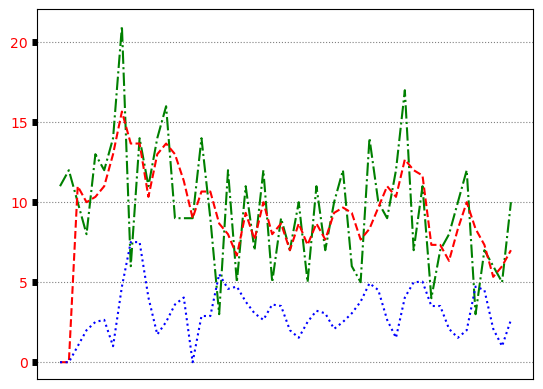

In [17]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
mean = sales_df['rolling_mean']
std = sales_df['rolling_std']

fig, ax = plt.subplots()
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, mean, linestyle='--', color = 'red')
ax.plot(date, std, linestyle=':', color = 'blue')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

### Computing expanding window statistics

In [18]:
window_min = 3

In [19]:
window_max = 10

In [20]:
for window in range(window_min, window_max + 1):
    sales_df[f'Expanding_Mean_{window}'] = sales_df['Purchase Quantity'].expanding(window).mean()
    sales_df[f'Expanding_Std_{window}'] = sales_df['Purchase Quantity'].expanding(window).std()
sales_df.fillna(0, inplace = True)

In [21]:
sales_df.columns

Index(['Purchase Quantity', 'Purchase Quantity 1', 'Purchase Quantity 2',
       'Purchase Quantity 3', 'rolling_mean', 'rolling_std',
       'Expanding_Mean_3', 'Expanding_Std_3', 'Expanding_Mean_4',
       'Expanding_Std_4', 'Expanding_Mean_5', 'Expanding_Std_5',
       'Expanding_Mean_6', 'Expanding_Std_6', 'Expanding_Mean_7',
       'Expanding_Std_7', 'Expanding_Mean_8', 'Expanding_Std_8',
       'Expanding_Mean_9', 'Expanding_Std_9', 'Expanding_Mean_10',
       'Expanding_Std_10'],
      dtype='object')

In [22]:
sales_df[['Expanding_Mean_3', 'Expanding_Std_3', 'Expanding_Mean_4',
       'Expanding_Std_4', 'Expanding_Mean_5', 'Expanding_Std_5',
       'Expanding_Mean_6', 'Expanding_Std_6', 'Expanding_Mean_7',
       'Expanding_Std_7', 'Expanding_Mean_8', 'Expanding_Std_8',
       'Expanding_Mean_9', 'Expanding_Std_9', 'Expanding_Mean_10',
       'Expanding_Std_10']].head(5).transpose()

Week,W0,W1,W2,W3,W4
Expanding_Mean_3,0.0,0.0,11.0,10.250000,10.800000
Expanding_Std_3,0.0,0.0,1.0,1.707825,1.923538
Expanding_Mean_4,0.0,0.0,0.0,10.250000,10.800000
Expanding_Std_4,0.0,0.0,0.0,1.707825,1.923538
Expanding_Mean_5,0.0,0.0,0.0,0.000000,10.800000
Expanding_Std_5,0.0,0.0,0.0,0.000000,1.923538
Expanding_Mean_6,0.0,0.0,0.0,0.000000,0.000000
Expanding_Std_6,0.0,0.0,0.0,0.000000,0.000000
Expanding_Mean_7,0.0,0.0,0.0,0.000000,0.000000
Expanding_Std_7,0.0,0.0,0.0,0.000000,0.000000


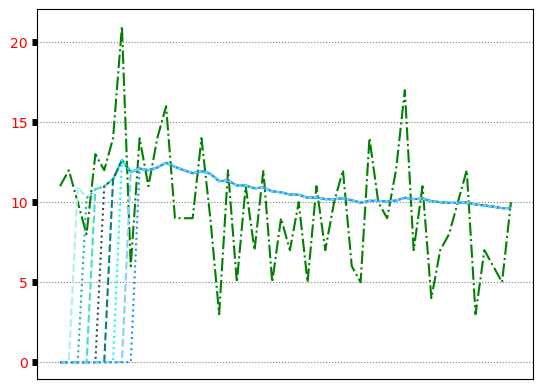

In [23]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
exp1 = sales_df['Expanding_Mean_3']
exp2 = sales_df['Expanding_Mean_4']
exp3 = sales_df['Expanding_Mean_5']
exp4 = sales_df['Expanding_Mean_6']
exp5 = sales_df['Expanding_Mean_7']
exp6 = sales_df['Expanding_Mean_8']
exp7 = sales_df['Expanding_Mean_9']
exp8 = sales_df['Expanding_Mean_10']

fig, ax = plt.subplots()
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, exp1, linestyle='--', color = 'paleturquoise')
ax.plot(date, exp2, linestyle=':', color = 'lightseagreen')
ax.plot(date, exp3, linestyle='--', color = 'turquoise')
ax.plot(date, exp4, linestyle=':', color = 'darkslategrey')
ax.plot(date, exp5, linestyle='--', color = 'teal')
ax.plot(date, exp6, linestyle=':', color = 'aqua')
ax.plot(date, exp7, linestyle='--', color = 'lightskyblue')
ax.plot(date, exp8, linestyle=':', color = 'dodgerblue')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

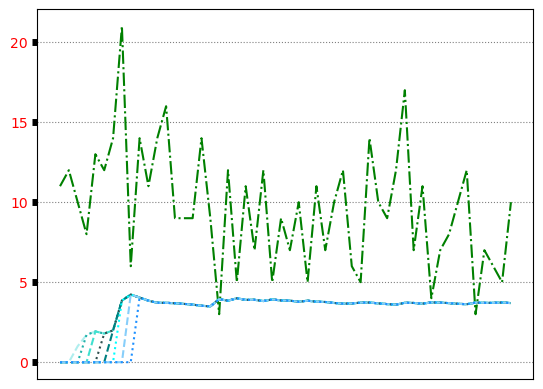

In [24]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
exp1 = sales_df['Expanding_Std_3']
exp2 = sales_df['Expanding_Std_4']
exp3 = sales_df['Expanding_Std_5']
exp4 = sales_df['Expanding_Std_6']
exp5 = sales_df['Expanding_Std_7']
exp6 = sales_df['Expanding_Std_8']
exp7 = sales_df['Expanding_Std_9']
exp8 = sales_df['Expanding_Std_10']

fig, ax = plt.subplots()
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, exp1, linestyle='--', color = 'paleturquoise')
ax.plot(date, exp2, linestyle=':', color = 'lightseagreen')
ax.plot(date, exp3, linestyle='--', color = 'turquoise')
ax.plot(date, exp4, linestyle=':', color = 'darkslategrey')
ax.plot(date, exp5, linestyle='--', color = 'teal')
ax.plot(date, exp6, linestyle=':', color = 'aqua')
ax.plot(date, exp7, linestyle='--', color = 'lightskyblue')
ax.plot(date, exp8, linestyle=':', color = 'dodgerblue')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

### Calculating exponential moving averages

In [25]:
def calc_exp_mov_avgs(alpha, dataset, inputvariable):
    ema_list = [dataset[inputvariable].iloc[0]]
    for i in range(1, len(dataset)):
        ema = alpha*dataset[inputvariable].iloc[i] + (1-alpha) * ema_list[-1]
        ema_list.append(ema)
    dataset['EMA'] = ema_list
    return dataset[[inputvariable, 'EMA']].head(10)

In [26]:
calc_exp_mov_avgs(0.3, sales_df, 'Purchase Quantity')

,Purchase Quantity,EMA
Week,,
W0,11,11.000000
W1,12,11.300000
W2,10,10.910000
W3,8,10.037000
W4,13,10.925900
W5,12,11.248130
W6,14,12.073691
W7,21,14.751584
W8,6,12.126109


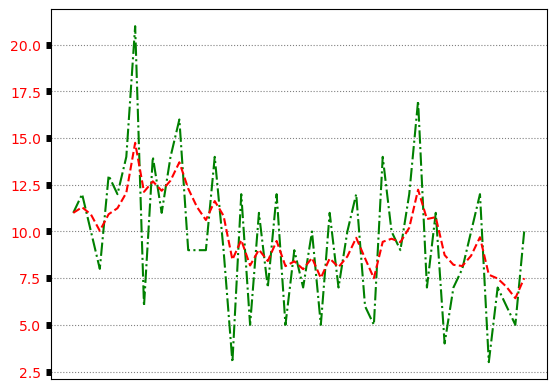

In [27]:
date = sales_df.index
variable = sales_df['Purchase Quantity']
ema = sales_df['EMA']

fig, ax = plt.subplots()
ax.plot(date, variable, linestyle='-.', color = 'green')
ax.plot(date, ema, linestyle='--', color = 'red')

ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)
ax.set_xticks([])

plt.show()

## Multivariate feature engineering

In [28]:
garment_df = pd.read_csv('garments_worker_productivity.csv')

In [29]:
garment_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
date,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015,1/1/2015
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,sweing,finishing,sweing,sweing,sweing,sweing,finishing,sweing,sweing,sweing
day,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday,Thursday
team,8,1,11,12,6,7,2,3,2,1
targeted_productivity,0.8,0.75,0.8,0.8,0.8,0.8,0.75,0.75,0.75,0.75
smv,26.16,3.94,11.41,11.41,25.9,25.9,3.94,28.08,19.87,28.08
wip,1108.0,NaN,968.0,968.0,1170.0,984.0,NaN,795.0,733.0,681.0
over_time,7080,960,3660,3660,1920,6720,960,6900,6000,6900
incentive,98,0,50,50,50,38,0,45,34,45


In [31]:
garment_df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [32]:
garment_df['date'] = pd.to_datetime(garment_df['date'])

In [33]:
garment_df['date']

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [34]:
garment_df = garment_df.sort_values(by='date')

In [35]:
garment_df['team'].unique()

array([ 8, 11,  4,  7, 10,  5,  9,  2,  3,  6, 12,  1], dtype=int64)

In [36]:
garment_df_team1 = garment_df[garment_df['team']==1]

In [37]:
garment_df_team1.reset_index(inplace = True, drop = True)

In [38]:
garment_df_team1.head(5).transpose()

,0,1,2,3,4
date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-03 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00
quarter,Quarter1,Quarter1,Quarter1,Quarter1,Quarter1
department,finishing,sweing,sweing,finishing,finishing
day,Thursday,Thursday,Saturday,Saturday,Sunday
team,1,1,1,1,1
targeted_productivity,0.75,0.75,0.8,0.8,0.8
smv,3.94,28.08,28.08,3.94,3.94
wip,NaN,681.0,772.0,NaN,NaN
over_time,960,6900,6300,960,960
incentive,0,45,50,0,0


In [42]:
garment_df_team1[['smv', 'wip', 'incentive']].describe(percentiles = [0.25, 0.5, 0.75, 0.98])

,smv,wip,incentive
count,105.000000,56.000000,105.000000
mean,15.370857,1609.196429,46.600000
std,11.336076,2105.399150,98.837824
min,3.940000,171.000000,0.000000
25%,3.940000,1185.000000,0.000000
50%,22.520000,1418.000000,30.000000
75%,26.160000,1537.000000,75.000000
98%,28.080000,1870.700000,113.000000
max,49.100000,16882.000000,960.000000


In [43]:
def treat_outlier(dataset, variable, x):
    cap = dataset[variable].describe(percentiles =[0.98])['98%']
    if (x>cap):
        return cap
    else:
        return x

In [44]:
garment_df_team1['wip'] = garment_df_team1['wip'].apply(lambda x: treat_outlier(garment_df_team1, 'wip', x))

In [45]:
garment_df_team1['incentive'] = garment_df_team1['wip'].apply(lambda x: treat_outlier(garment_df_team1, 'incentive', x))

In [51]:
garment_df_team1[['smv', 'wip', 'incentive']].describe()

,smv,wip,incentive
count,105.000000,105.000000,105.000000
mean,15.370857,715.270476,60.266667
std,11.336076,717.827721,56.644687
min,3.940000,0.000000,0.000000
25%,3.940000,0.000000,0.000000
50%,22.520000,708.000000,113.000000
75%,26.160000,1422.000000,113.000000
max,49.100000,1870.700000,113.000000


### Creating lag based multivariate features

In [46]:
lag_order = 2
for variable in ['smv', 'wip', 'incentive']:
    for lag in range(1, lag_order + 1):
        col_name = f'{variable}_Lag{lag}'
        garment_df_team1[col_name] = garment_df_team1[variable].shift(lag)
garment_df_team1 = garment_df_team1.fillna(0)

In [47]:
garment_df_team1[['smv', 'smv_Lag1', 'smv_Lag2', 'wip', 'wip_Lag1', 'wip_Lag2', 'incentive', 'incentive_Lag1',
       'incentive_Lag2']]

,smv,smv_Lag1,smv_Lag2,wip,wip_Lag1,wip_Lag2,incentive,incentive_Lag1,incentive_Lag2
0,3.94,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,28.08,3.94,0.00,681.0,0.0,0.0,113.0,0.0,0.0
2,28.08,28.08,3.94,772.0,681.0,0.0,113.0,113.0,0.0
3,3.94,28.08,28.08,0.0,772.0,681.0,0.0,113.0,113.0
4,3.94,3.94,28.08,0.0,0.0,772.0,0.0,0.0,113.0
...,...,...,...,...,...,...,...,...,...
100,26.82,3.94,3.94,1322.0,0.0,0.0,113.0,0.0,0.0
101,3.94,26.82,3.94,0.0,1322.0,0.0,0.0,113.0,0.0
102,26.82,3.94,26.82,1574.0,0.0,1322.0,113.0,0.0,113.0
103,26.82,26.82,3.94,1322.0,1574.0,0.0,113.0,113.0,0.0


### Creating interaction terms based features

In [55]:
garment_df_team1.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'smv_Lag1', 'smv_Lag2', 'wip_Lag1', 'wip_Lag2', 'incentive_Lag1',
       'incentive_Lag2'],
      dtype='object')

In [56]:
garment_df_team1['targeted_individual_productivity'] = garment_df_team1['targeted_productivity']/garment_df_team1['no_of_workers']

In [58]:
garment_df_team1['actual_individual_productivity'] = garment_df_team1['actual_productivity']/garment_df_team1['no_of_workers']

In [59]:
garment_df_team1['individual_productivity_gap'] = garment_df_team1['targeted_individual_productivity'] - garment_df_team1['actual_individual_productivity'] 

In [68]:
garment_df_team1[['date', 'targeted_productivity', 'actual_productivity', 'targeted_individual_productivity', 'actual_individual_productivity',
                 'individual_productivity_gap']].head(10)

,date,targeted_productivity,actual_productivity,targeted_individual_productivity,actual_individual_productivity,individual_productivity_gap
0,2015-01-01,0.75,0.886500,0.093750,0.110812,-0.017062
1,2015-01-01,0.75,0.750428,0.013043,0.013051,-0.000007
2,2015-01-03,0.80,0.800725,0.014159,0.014172,-0.000013
3,2015-01-03,0.80,0.902917,0.100000,0.112865,-0.012865
4,2015-01-04,0.80,0.915229,0.100000,0.114404,-0.014404
5,2015-01-04,0.80,0.800319,0.013559,0.013565,-0.000005
6,2015-01-05,0.80,0.800319,0.013559,0.013565,-0.000005
7,2015-01-05,0.80,0.961059,0.100000,0.120132,-0.020132
8,2015-01-06,0.80,0.850502,0.013559,0.014415,-0.000856
9,2015-01-06,0.80,0.936496,0.100000,0.117062,-0.017062


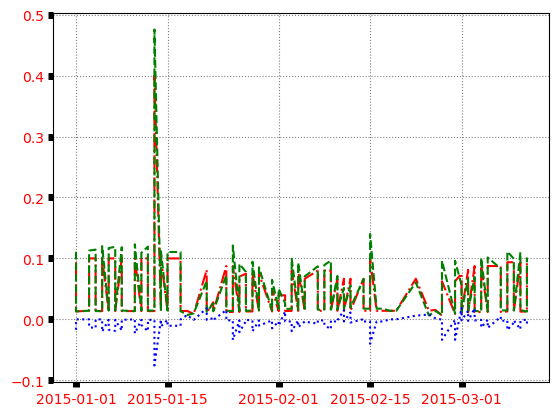

In [73]:
date = garment_df_team1['date']
tgt = garment_df_team1['targeted_individual_productivity']
act = garment_df_team1['actual_individual_productivity']
gap = garment_df_team1['individual_productivity_gap']


fig, ax = plt.subplots()
ax.plot(date, tgt, linestyle='-.', color = 'red')
ax.plot(date, act, linestyle='--', color = 'green')
ax.plot(date, gap, linestyle=':', color = 'blue')


ax.grid(True, linestyle=':', color = 'grey')
ax.tick_params(labelcolor='r', labelsize='medium', width=5)

plt.show()

### Creating aggregated features

In [88]:
garment_df_team1['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [89]:
garment_df_team1_agg = garment_df_team1[['date','targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']]

In [90]:
window = 6

In [91]:
columns = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']

In [92]:
for col in columns:
    garment_df_team1_agg[f'Aggregate_{col}'] = garment_df_team1_agg[col].rolling(window).mean()

In [93]:
garment_df_team1_agg.drop(columns = columns, inplace = True)

In [94]:
garment_df_team1_agg.dropna(inplace = True)

In [97]:
garment_df_team1_agg.head(5).transpose()

,5,6,7,8,9
date,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-06 00:00:00
Aggregate_targeted_productivity,0.783333,0.791667,0.8,0.8,0.8
Aggregate_smv,15.69,19.393333,15.37,15.05,15.05
Aggregate_wip,414.333333,604.0,490.5,559.666667,559.666667
Aggregate_over_time,3860.0,4880.0,4050.0,4770.0,4850.0
Aggregate_incentive,56.5,75.333333,56.5,56.5,56.5
Aggregate_idle_time,0.0,0.0,0.0,0.0,0.0
Aggregate_idle_men,0.0,0.0,0.0,0.0,0.0
Aggregate_no_of_style_change,0.0,0.0,0.0,0.0,0.0
Aggregate_no_of_workers,32.833333,41.333333,33.083333,33.5,33.5
